In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import _pca
import seaborn as sns
%matplotlib inline
import os
import json # will be needed for saving preprocessing details
import joblib # for saving algorithm and preprocessing objects


In [2]:
os.chdir('D:\\predict_01\\research\\Big Mart Sales Prediction\\Data')
Sales_train = pd.read_csv("Train.csv")
Sales_train1=Sales_train
Sales_train["Type"] = "train"
print(Sales_train.shape)

(8523, 13)


In [3]:
Sales_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
Sales_train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [5]:
Sales_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Type                            0
dtype: int64

In [6]:
Sales_test = pd.read_csv("Test.csv")
Sales_test["Type"] = "test"
print(Sales_test.shape)
Sales_test1=Sales_test
Data_Predicted = Sales_test.loc[:,["Item_Identifier","Outlet_Identifier","Item_MRP"]]  ## will use later while prediction
Data_Predicted.head()

(5681, 12)


,Item_Identifier,Outlet_Identifier,Item_MRP
0,FDW58,OUT049,107.8622
1,FDW14,OUT017,87.3198
2,NCN55,OUT010,241.7538
3,FDQ58,OUT017,155.0340
4,FDY38,OUT027,234.2300


In [7]:
Sales_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
# Check values in Item_Weight column
Sales_train1['Item_Weight'].interpolate(inplace=True)

In [9]:
#Values has been filled
print(Sales_train1['Item_Weight'].isna().sum())
Sales_train1['Item_Weight'].sample(10)

0


6162     5.9450
3148    18.2500
1237    16.6000
6019    10.4550
1127    15.3225
2425    11.9550
5136    17.7500
5014     8.6000
6518     7.3900
3548     6.6500
Name: Item_Weight, dtype: float64

In [10]:
Sales_train1.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
Sales_train1.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
Sales_train1.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
Sales_train1.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
Sales_train1.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<H1>Univarient analysis</H1>

In [15]:
#Analyzing each features using graph.

#Distribution of Item_Outlet_Sales of the target variable and it’s skewed graph:

Text(0.5, 1.0, 'Item_Outlet_Sales_Distribution')

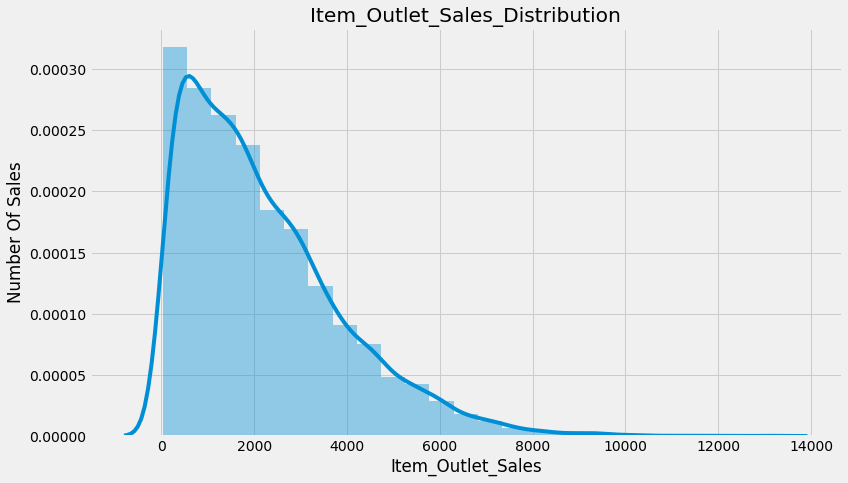

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(Sales_train1.Item_Outlet_Sales,bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number Of Sales")
plt.title("Item_Outlet_Sales_Distribution")

In [17]:
print("skew is:",Sales_train1.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % Sales_train1.Item_Outlet_Sales.kurt())

skew is: 1.1775306028542796
Kurtosis: 1.615877


In [18]:
numeric_features=Sales_train1.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [19]:
corr=numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012240,0.024839,0.001220,0.014536
Item_Visibility,-0.012240,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024839,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.001220,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014536,-0.128625,0.567574,-0.049135,1.000000


In [20]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014536
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


<H2>Correlation matrix generation:</H2>

<AxesSubplot:>

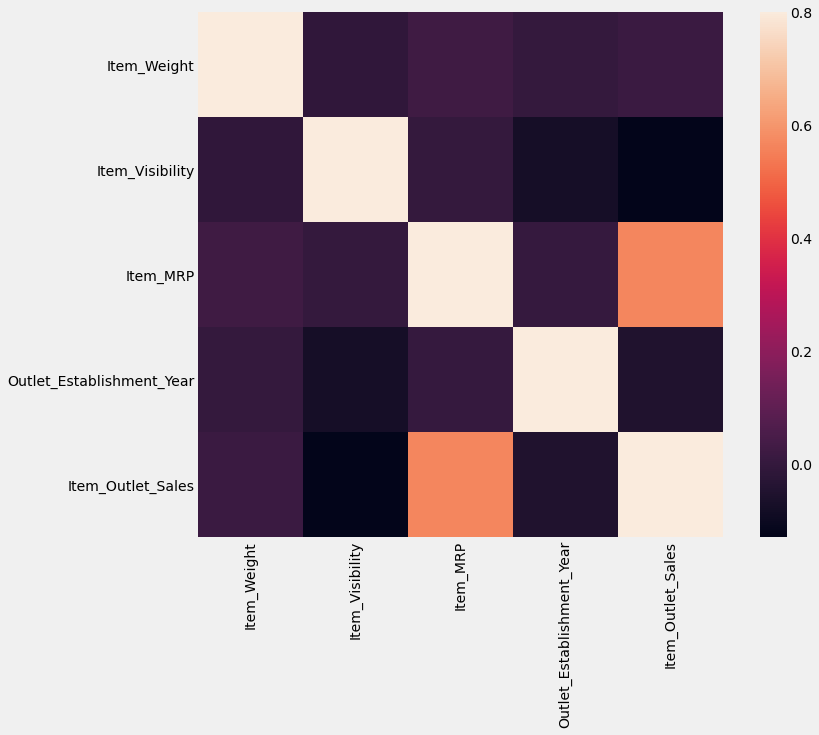

In [21]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corr,vmax=.8,square=True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

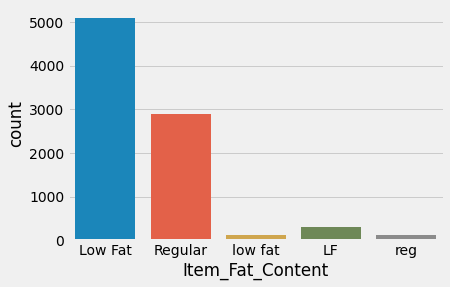

In [22]:
sns.countplot(Sales_train1.Item_Fat_Content)

<H2>Distribution of the variable Item_Type:</H2>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

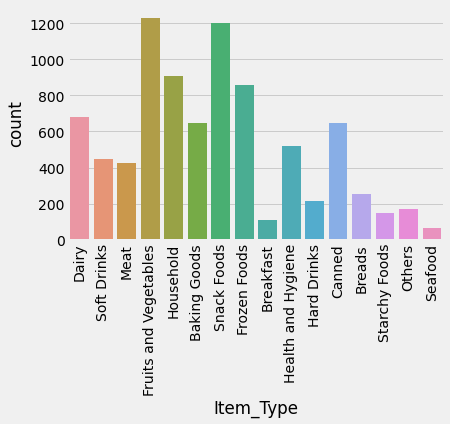

In [23]:
sns.countplot(Sales_train1.Item_Type)
plt.xticks(rotation=90)

<H2>Distribution of the variable Outlet_Size:</H2>

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

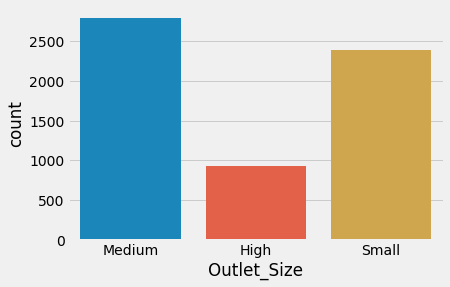

In [24]:
sns.countplot(Sales_train1.Outlet_Size)
#plt.xticks(rotation=90)

<H2>Distribution of the variable Outlet_Location_Type:</H2>

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

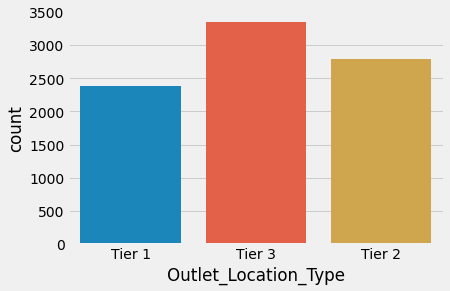

In [25]:
sns.countplot(Sales_train1.Outlet_Location_Type)

<H2>Distribution of the variable Outlet_Type:</H2>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

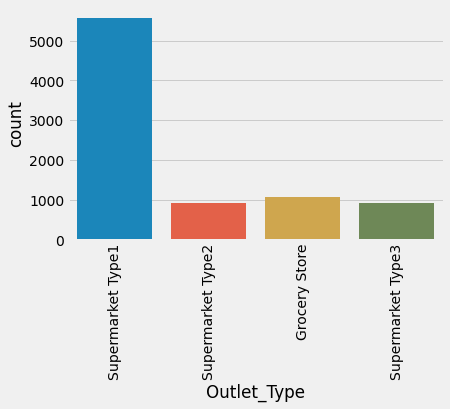

In [26]:
sns.countplot(Sales_train1.Outlet_Type)
plt.xticks(rotation=90)

<H2>Bivariate Analysis:</H2> 

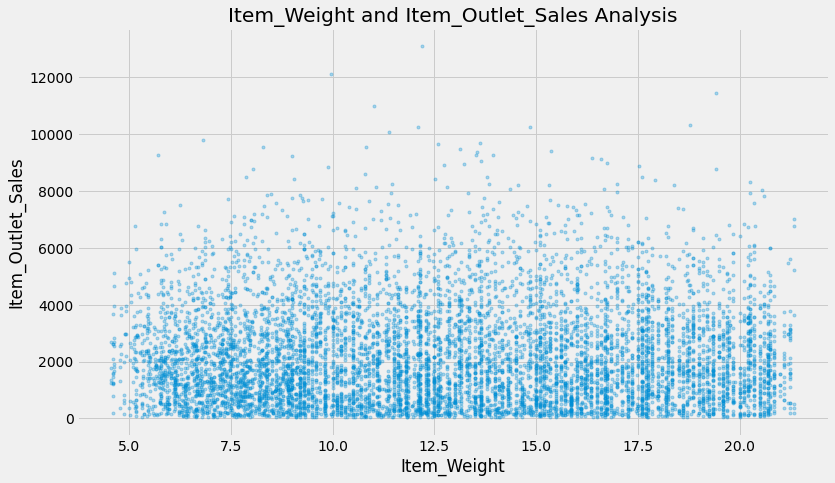

In [27]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(Sales_train1.Item_Weight, Sales_train1["Item_Outlet_Sales"],'.', alpha=0.3)


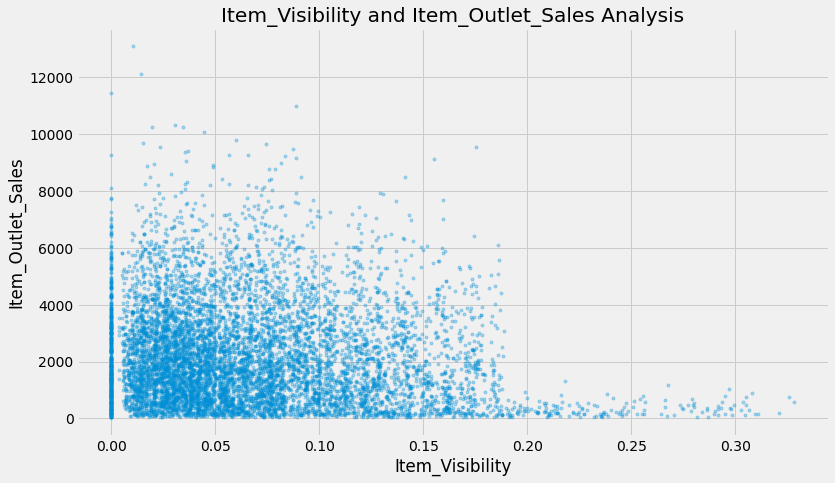

In [28]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(Sales_train1.Item_Visibility, Sales_train1["Item_Outlet_Sales"],'.', alpha=0.3)



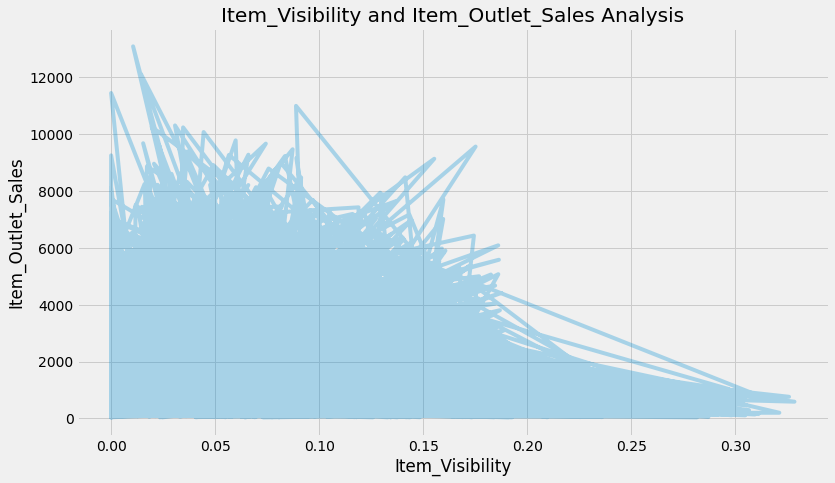

In [29]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(Sales_train1.Item_Visibility, Sales_train1["Item_Outlet_Sales"], alpha=0.3)

<H2>Outlet_Establishment_Year and Item_Outlet_Sales:</H2>

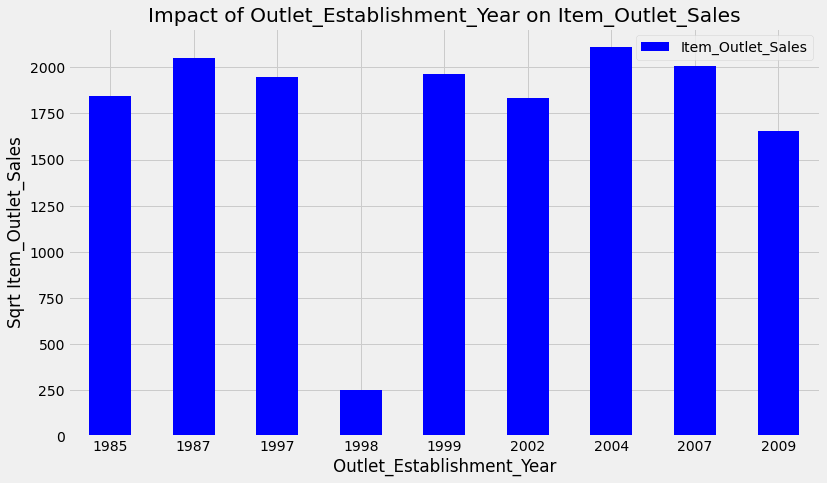

In [30]:
Outlet_Establishment_Year_pivot= \
Sales_train1.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar',color='blue' ,figsize=(12,7))
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Sqrt Item_Outlet_Sales')
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


<H2>Categorical Variables:</H2>

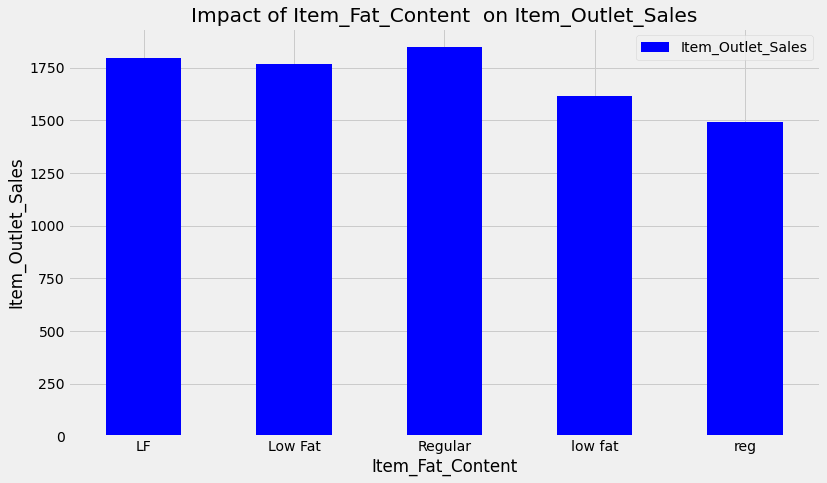

In [31]:
Item_Fat_Content_pivot=\
Sales_train1.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar',color='blue' ,figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content  on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


<h2>Outlet_Identifier and Item_Outlet_Sales:</h2>

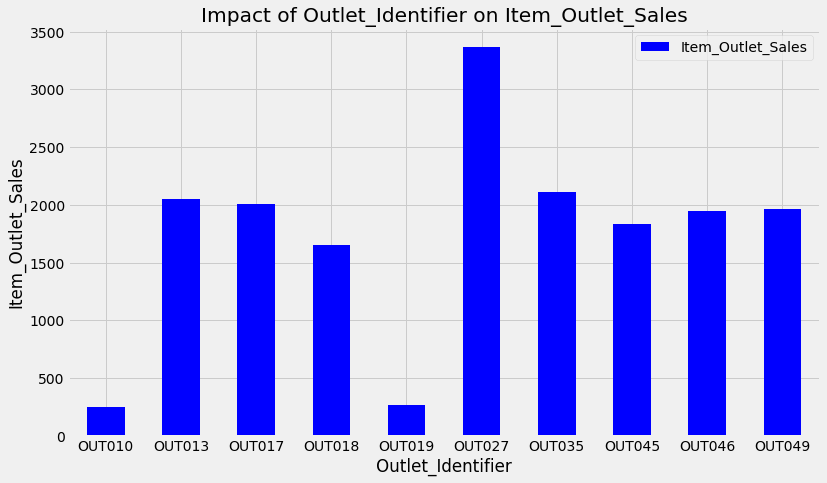

In [32]:
Outlet_Identifier_pivot= \
Sales_train1.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar',color='blue' ,figsize=(12,7))
plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [33]:
Sales_train1.pivot_table(values='Outlet_Type',columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [34]:
Sales_train1.pivot_table(values='Outlet_Type',columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


<H2>Outlet_Size and Item_Outlet_Sales:</H2>

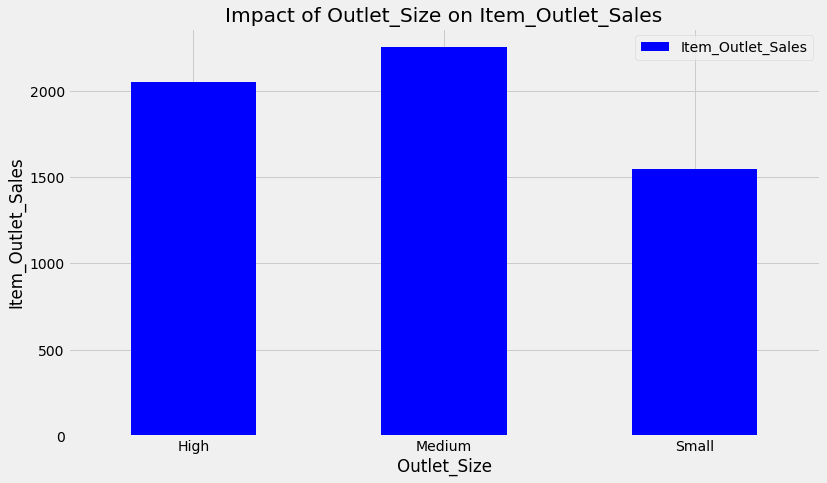

In [35]:
Outlet_Size_pivot= \
Sales_train1.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar',color='blue' ,figsize=(12,7))
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<H2>Outlet_Type and Item_Outlet_Sales:</H2>

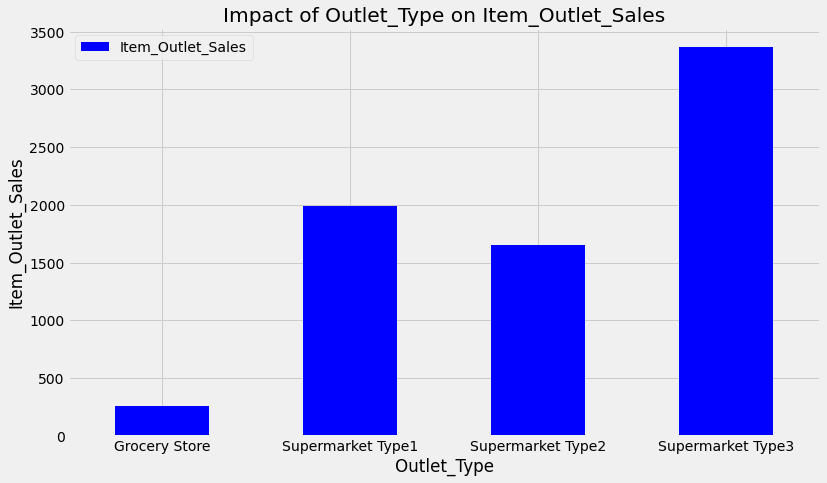

In [36]:
Outlet_Type_pivot= \
Sales_train1.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar',color='blue' ,figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<h2>Outlet_Location_Type and Item_Outlet_Sales:</h2>

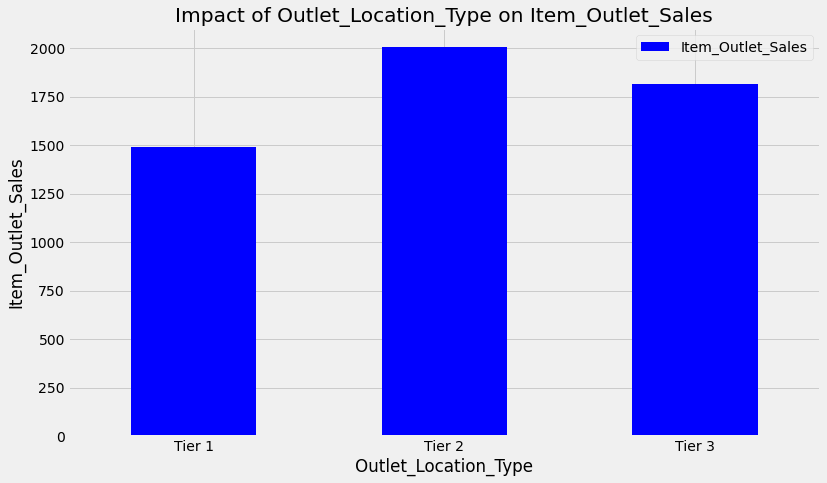

In [37]:
Outlet_Location_Type_pivot= \
Sales_train1.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar',color='blue' ,figsize=(12,7))
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [38]:
Sales_train1.pivot_table(values='Outlet_Location_Type',columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


In [39]:
Sales_train1['source']='train1'
Sales_test1['source']='test1'
data=pd.concat([Sales_train1,Sales_test1],ignore_index= True)
print(Sales_train1.shape , Sales_test1.shape,data.shape)

(8523, 14) (5681, 13) (14204, 14)


In [40]:
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                   6.871304
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
Type                          0.000000
source                        0.000000
dtype: float64

In [41]:
Item_avg_weight = data.pivot_table(values='Item_Weight' ,index='Item_Identifier')
print(Item_avg_weight)


                 Item_Weight
Item_Identifier             
DRA12              11.600000
DRA24              17.903500
DRA59               8.940250
DRB01               8.780714
DRB13               6.115000
...                      ...
NCZ30               7.566111
NCZ41              19.850000
NCZ42              10.500000
NCZ53               9.575556
NCZ54              13.434125

[1559 rows x 1 columns]


In [42]:
data[:][data['Item_Identifier']=='DRILL']
def impute_weight(cols):
  Weight=cols[0]
  Identifier=cols[1]

  if pd.isnull(Weight):
    return Item_avg_weight['Item_Weight'][Item_avg_weight.index== Identifier]
  else:
    return Weight

print('Original #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight']=data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print('Final #missing: %d '%sum(data['Item_Weight'].isnull()))


Original #missing: 976
Final #missing: 0 


In [43]:
from scipy.stats import mode
outlet_size_mode=data.pivot_table(values='Outlet_Size', columns='Outlet_Type' , aggfunc=lambda x:x.mode())
outlet_size_mode


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [44]:
def impute_size_mode(cols):
  Size=cols[0]
  Type=cols[1]

  if pd.isnull(Size):
    return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns==Type][0]
  else :
    return Size


print('Original #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size']=data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))


Original #missing: 4016
Final #missing: 0


<H2>Feature Engineering</H2>

In [45]:
data.pivot_table(values='Item_Outlet_Sales',columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


<h2>Determining years of Operation of stores</h2>

In [46]:
data['Outlet_Years']=2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [47]:
train_mode = dict(Sales_train1.mode().iloc[0])
Sales_train1 = Sales_train1.fillna(train_mode)
print(train_mode)

{'Item_Identifier': 'FDG33', 'Item_Weight': 12.15, 'Item_Fat_Content': 'Low Fat', 'Item_Visibility': 0.0, 'Item_Type': 'Fruits and Vegetables', 'Item_MRP': 172.0422, 'Outlet_Identifier': 'OUT027', 'Outlet_Establishment_Year': 1985.0, 'Outlet_Size': 'Medium', 'Outlet_Location_Type': 'Tier 3', 'Outlet_Type': 'Supermarket Type1', 'Item_Outlet_Sales': 958.752, 'Type': 'train', 'source': 'train1'}


In [48]:
dframes = [Sales_train,Sales_test]
Sales = pd.concat(dframes,ignore_index = True)
print(Sales.shape)
Sales.tail()

(14204, 14)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,test1
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,test1
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test,test1
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test,test1
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test,test1


In [49]:
Sales.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type,source
count,14204,13228.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2,2
top,DRG48,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train,train1
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523,8523
mean,NaN,12.782995,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN,NaN
std,NaN,4.524758,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN,NaN
25%,NaN,8.895000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN,NaN
75%,NaN,16.600000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN,NaN


## Visibility can't be 0
###### hence imputing it

In [50]:
Sales["Item_Visibility"].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [51]:
UniqueItems = set(Sales.Item_Identifier)
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Visibility"]==0),"Item_Visibility"] = Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Visibility"]!=0),"Item_Visibility"].mean()
Sales["Item_Visibility"].describe()

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

### Adding new feature Quantity Sold

In [52]:
Sales["Qty_Sold"] = (Sales["Item_Outlet_Sales"]/Sales["Item_MRP"])
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type,source,Qty_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,train1,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,train1,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,train1,14.809346
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,train1,4.021967
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,train1,18.467868


In [53]:
Sales.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Type                            0
source                          0
Qty_Sold                     5681
dtype: int64

### To impute "Item_Weight", we are filtering the data for each unique "Item_Identifier" and then assigning the mean value of that category to the one which is "NA"

In [54]:
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Weight"].isnull()),"Item_Weight"] = Sales.loc[Sales["Item_Identifier"]==str(each),"Item_Weight"].mode()[0]

### cheking the imputation

In [55]:
Sales.Item_Weight.isnull().sum()

0

### Changing the Year Establishment year to Age

In [56]:
import datetime
now = datetime.datetime.now()
now.year

Sales["Outlet_Age"] = now.year - Sales["Outlet_Establishment_Year"]
Sales["Outlet_Age"].head()

0    23
1    13
2    23
3    24
4    35
Name: Outlet_Age, dtype: int64

In [57]:
Sales.describe(include=["object"]).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Type', 'source'],
      dtype='object')

In [58]:
Sales.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [59]:
Sales.loc[Sales["Outlet_Size"].isnull(),"Outlet_Identifier"].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

### Looking for pattern for the missing Outlet_size

In [60]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT045") ,].describe(include = [object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type,source
count,1548,1548,1548,1548,0,1548,1548,1548,1548
unique,1548,5,16,1,0,1,1,2,2
top,FDF09,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1,train,train1
freq,1,932,218,1548,NaN,1548,1548,929,929


In [61]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT017") ,].describe(include = [object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type,source
count,1543,1543,1543,1543,0,1543,1543,1543,1543
unique,1543,5,16,1,0,1,1,2,2
top,FDW27,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1,train,train1
freq,1,928,219,1543,NaN,1543,1543,926,926


In [62]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT010") ,].describe(include = [object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type,source
count,925,925,925,925,0,925,925,925,925
unique,925,5,16,1,0,1,1,2,2
top,FDQ33,Low Fat,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train,train1
freq,1,543,137,925,NaN,925,925,555,555


### As for OUT045 and OUT017; Outlet_Location_Type	and Outlet_Type are same i.e. Tier 2 and Supermarket Type1, hence we can impute the data as per this

In [63]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 2") & (Sales["Outlet_Type"]=="Supermarket Type1") ,"Outlet_Size"].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [64]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"] = "Small"
Sales.loc[ (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"].value_counts()

Small    3091
Name: Outlet_Size, dtype: int64

## for "OUT010"

In [65]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") & (Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [66]:
Sales.loc[(Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Small    880
Name: Outlet_Size, dtype: int64

In [67]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") ,"Outlet_Size"].value_counts()

Medium    3105
High      1553
Name: Outlet_Size, dtype: int64

In [68]:
Sales.loc[Sales["Outlet_Size"].isnull(),].shape

(925, 16)

In [69]:
Sales['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

### To impute "Outlet_Size for OUT010", we will build a classifier

### Changing the categorical data to numeric/dummy

##### imputing ordinal data

In [70]:
mapping_Item_Type = {'Fruits and Vegetables': "Fruit_Veg",
                    'Household':"HH_HH", 'Health and Hygiene':"HH_HH",
                    'Baking Goods': "Bake_Snacks", 'Snack Foods': "Bake_Snacks",
                    'Canned': "Frozen_Canned", 'Frozen Foods': "Frozen_Canned",
                    'Dairy': "DBBS", 'Breakfast': "DBBS", 'Breads': "DBBS", 'Starchy Foods': "DBBS",
                    'Seafood':"Seafood_Meat", 'Meat': "Seafood_Meat",
                    'Hard Drinks': "Drinks", 'Soft Drinks': "Drinks",
                    'Others':"Others"}
Sales['Item_Type'] = Sales['Item_Type'].map(mapping_Item_Type)

mapping_Item_Fat_Content = {'Regular': 1, "reg": 1,'LF': 0,'Low Fat': 0, "low fat":0}
Sales['Item_Fat_Content'] = Sales['Item_Fat_Content'].map(mapping_Item_Fat_Content)

mapping_Outlet_Size = {'Small': 1, "Medium": 2,'High': 3}
Sales['Outlet_Size'] = Sales['Outlet_Size'].map(mapping_Outlet_Size)

In [71]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type,source,Qty_Sold,Outlet_Age
0,FDA15,9.30,0,0.016047,DBBS,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380,train,train1,14.951963,23
1,DRC01,5.92,1,0.019278,Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228,train,train1,9.186454,13
2,FDN15,17.50,0,0.016760,Seafood_Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700,train,train1,14.809346,23
3,FDX07,19.20,1,0.022930,Fruit_Veg,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,train1,4.021967,24
4,NCD19,8.93,0,0.014670,HH_HH,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052,train,train1,18.467868,35


##### imputing nominal data

In [72]:
Sales = pd.get_dummies(Sales,columns=["Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [73]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Type,source,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,1999,2.0,3735.1380,train,train1,...,0,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,2009,2.0,443.4228,train,train1,...,0,0,0,0,0,0,1,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,1999,2.0,2097.2700,train,train1,...,0,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,1,0.022930,182.0950,1998,NaN,732.3800,train,train1,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.014670,53.8614,1987,3.0,994.7052,train,train1,...,0,0,0,0,0,0,1,1,0,0


In [74]:
Sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Item_Outlet_Sales', 'Type', 'source', 'Qty_Sold', 'Outlet_Age',
       'Item_Type_DBBS', 'Item_Type_Drinks', 'Item_Type_Frozen_Canned',
       'Item_Type_Fruit_Veg', 'Item_Type_HH_HH', 'Item_Type_Others',
       'Item_Type_Seafood_Meat', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [75]:
X_Cols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
y_cols = 'Outlet_Size'

In [76]:
from sklearn.model_selection import train_test_split
X = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), X_Cols]
y = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [77]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (5577, 27)
Shape of y_train:  (5577,)
Shape of X_test:  (2391, 27)
Shape of y_test:  (2391,)


In [78]:
Sales[y_cols].value_counts()

1.0    7071
2.0    4655
3.0    1553
Name: Outlet_Size, dtype: int64

### As there are 3 categories, we can use all the classificaition techniques except Logistic Regression

## Trying K-Nearest Neighbours

In [79]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [80]:
def IdentifyKValueCrossValidation(X,Y,startK,endK,cv,scoring):
    k_range = list(range(startK, endK+1))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, Y, cv=cv, scoring=scoring)
        k_scores.append(scores.mean())
    z = [i for i, j in enumerate(k_scores) if j == max(k_scores)]
    
    print("Location for Max Accuaracy is:")
    
    for i in z:
        print(k_range[i])
    
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    
    return k_range[i]

def metrices(Predicted,Actual):
    print("Confusion Matrix for the model is:\n\n {}".format(metrics.confusion_matrix(y_pred=Predicted,y_true=Actual)))
    print("\nAccuracy for the model is: {}".format(metrics.accuracy_score(y_pred=Predicted, y_true= Actual)))
    print("\nArea under the curve for the model is: {}".format(metrics.roc_auc_score(y_score=Predicted,y_true=Actual)))
    print("\nClassification Report for the model is:\n {}".format(metrics.classification_report(y_pred=Predicted,y_true=y_test)))

Location for Max Accuaracy is:
1
Value of K with is: 1


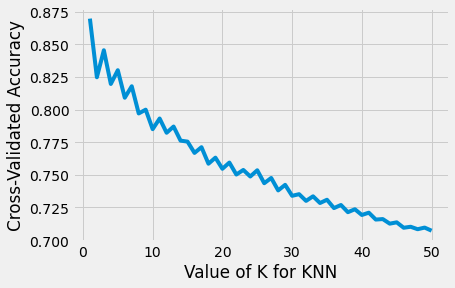

In [81]:
from sklearn.model_selection import cross_val_score

K = IdentifyKValueCrossValidation(X=X,Y=y,cv=5,startK=1,endK=50,scoring="accuracy")
print("Value of K with is: {}".format(K))

In [82]:
knn = KNeighborsClassifier(n_neighbors=K)
y_predicted = knn.fit(X_train,y_train).predict(X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])
X_train

Test Accuracy:  0.8582183186951067


,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Qty_Sold,Outlet_Age,Item_Type_DBBS,Item_Type_Drinks,Item_Type_Frozen_Canned,Item_Type_Fruit_Veg,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
2603,0,53.2982,0.056191,12.600,13.816129,20,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8246,0,178.3660,0.032442,20.850,26.204075,18,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
7783,0,101.3016,0.046959,14.100,22.977296,37,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1292,0,159.6604,0.031322,6.965,20.842165,20,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4270,1,132.9626,0.048518,5.465,17.756322,18,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7564,0,44.9086,0.071077,7.930,17.879756,35,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7913,1,187.1556,0.048132,20.600,25.080147,13,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4676,0,153.8024,0.023333,13.725,50.336811,37,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2693,1,168.6448,0.058543,14.475,20.213466,37,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [130]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1280
         2.0       1.00      1.00      1.00       820
         3.0       1.00      1.00      1.00       291

    accuracy                           1.00      2391
   macro avg       1.00      1.00      1.00      2391
weighted avg       1.00      1.00      1.00      2391



### Multinomial Classifier

In [84]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [131]:
md = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [86]:
y_predicted = md.predict(X=X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])
#pd.Series(y_predicted).value_counts()

Test Accuracy:  1.0


In [87]:
pd.Series(md.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

### AdaBoost

In [132]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X_train, y_train)
scores.mean() 

1.0

In [89]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [90]:
pd.Series(clf.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

### As majority of the predictions for Multinomial and AdaBoost was 100% accuracy were Medium, hence we will impute accordingly

In [91]:
Sales.loc[(Sales["Outlet_Size"].isnull()),"Outlet_Size"] = 2
Sales["Outlet_Size"].value_counts()

1.0    7071
2.0    5580
3.0    1553
Name: Outlet_Size, dtype: int64

In [92]:
Sales["Outlet_Size"] = Sales["Outlet_Size"].astype(int).astype(object)
Sales["Outlet_Size"].value_counts()

1    7071
2    5580
3    1553
Name: Outlet_Size, dtype: int64

In [93]:
Sales.isnull().sum()

Item_Identifier                     0
Item_Weight                         0
Item_Fat_Content                    0
Item_Visibility                     0
Item_MRP                            0
Outlet_Establishment_Year           0
Outlet_Size                         0
Item_Outlet_Sales                5681
Type                                0
source                              0
Qty_Sold                         5681
Outlet_Age                          0
Item_Type_DBBS                      0
Item_Type_Drinks                    0
Item_Type_Frozen_Canned             0
Item_Type_Fruit_Veg                 0
Item_Type_HH_HH                     0
Item_Type_Others                    0
Item_Type_Seafood_Meat              0
Outlet_Identifier_OUT013            0
Outlet_Identifier_OUT017            0
Outlet_Identifier_OUT018            0
Outlet_Identifier_OUT019            0
Outlet_Identifier_OUT027            0
Outlet_Identifier_OUT035            0
Outlet_Identifier_OUT045            0
Outlet_Ident

## Hurray! Imputing is DONE!

In [94]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [95]:
Sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Item_Outlet_Sales', 'Type', 'source', 'Qty_Sold', 'Outlet_Age',
       'Item_Type_DBBS', 'Item_Type_Drinks', 'Item_Type_Frozen_Canned',
       'Item_Type_Fruit_Veg', 'Item_Type_HH_HH', 'Item_Type_Others',
       'Item_Type_Seafood_Meat', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [96]:
XCols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Outlet_Size', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
YCols = 'Qty_Sold'

In [97]:
XX = Sales.loc[Sales["Type"]=="train",XCols]
yy = Sales.loc[Sales["Type"]=="train",YCols]
print(XX.shape)
print(yy.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(8523, 27)
(8523,)


### Linear Regression with all the columns

In [98]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (XX_train,yy_train)
print(reg.intercept_)
reg.coef_

20453826640929.426


array([ 4.05247500e-01,  1.86616808e-03, -4.44719129e-01, -1.58461575e-02,
       -3.41128613e+13,  2.85568492e+12, -3.15040471e-01,  7.81534797e-02,
       -6.74041396e-02,  2.38935962e-01,  5.71143607e-02, -2.72536681e-01,
        2.99427901e-02,  9.05448749e+12, -3.07350923e+13,  2.13946674e+14,
       -9.20013074e+13,  6.55375806e+12, -3.93021470e+13, -4.50135169e+13,
       -5.13789280e+13, -1.15546969e+13,  7.91301344e+12, -2.07645422e+13,
       -6.35416033e+12, -1.82534140e+14, -4.36776620e+13])

In [99]:
print(len(reg.coef_))
len(XCols)

27


27

In [100]:
coef1 = pd.DataFrame(reg.coef_,XCols,columns=["Value"])
#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

In [101]:
yy_predicted = reg.predict(XX_test)
metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted)

48.70010659467016

In [102]:
r2_score(yy_test, yy_predicted)

0.4181379921356293

### LASSO

In [103]:
Lasso = linear_model.LassoCV(cv=5,normalize=True,random_state=10,alphas=[.0005])
Lasso
Lasso.fit(XX_train,yy_train)
print(Lasso.intercept_)
coef1 = pd.DataFrame(Lasso.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

2.909110778928401


,Value
Outlet_Type_Supermarket Type1,13.444652
Outlet_Identifier_OUT027,12.643665
Outlet_Type_Supermarket Type3,11.182999
Outlet_Type_Supermarket Type2,10.807275
Outlet_Identifier_OUT017,0.495900
Outlet_Identifier_OUT035,0.314204
Item_Fat_Content,0.279724
Outlet_Identifier_OUT049,0.156821
Item_Type_Fruit_Veg,0.116154
Item_MRP,0.001304


In [104]:
yy_predicted = Lasso.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.6382633617556
0.4188768863638491


In [105]:
LassoPredict=Lasso.fit(XX,yy)
LassoPredict

LassoCV(alphas=[0.0005], cv=5, normalize=True, random_state=10)

## Adaptive Boost

In [106]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)

In [107]:
regressor.fit(XX_train, yy_train)

AdaBoostRegressor(learning_rate=0.005, n_estimators=100)

In [108]:
yy_predicted = regressor.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.67702389752501
0.4184137809469268


In [109]:
AdaBoostReg=regressor.fit(XX,yy)
AdaBoostReg

AdaBoostRegressor(learning_rate=0.005, n_estimators=100)

### Ridge

In [110]:
Ridge = linear_model.Ridge(random_state=10,normalize=True,alpha=.001)
Ridge

Ridge(alpha=0.001, normalize=True, random_state=10)

In [111]:
Ridge.fit(XX_train,yy_train)
#print(Ridge.intercept_)
coef1 = pd.DataFrame(Ridge.coef_,XCols,columns=["Value"])
#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

In [112]:
yy_predicted = Ridge.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.665930381357455
0.41854632471413566


In [113]:
Ridgefit=Ridge.fit(XX,yy)
Ridgefit

Ridge(alpha=0.001, normalize=True, random_state=10)

### Decision tree for Regression

In [114]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_depth=3)
Dtree.fit(XX_train,yy_train)

DecisionTreeRegressor(max_depth=3)

In [115]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.87287061854639
0.4160738319345847


In [116]:
Dtree.fit(XX,yy)

DecisionTreeRegressor(max_depth=3)

In [117]:
from sklearn.ensemble import RandomForestRegressor
RForrest = RandomForestRegressor()
RandomForestReg=RForrest.fit(XX_train,yy_train)
RandomForestReg

RandomForestRegressor()

In [118]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.343750262918995
0.4223956873483664


In [133]:
DecisionTreeReg=Dtree.fit(XX,yy)
DecisionTreeReg

DecisionTreeRegressor(max_depth=3)

## Testing the MODEL to real world data

In [120]:
Sales_Predict = Sales.loc[Sales["Type"]=="test",XCols]
Sales_Predict.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Size,Outlet_Age,Item_Type_DBBS,Item_Type_Drinks,Item_Type_Frozen_Canned,Item_Type_Fruit_Veg,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,0,107.8622,0.007565,20.750,2,23,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8524,1,87.3198,0.038428,8.300,1,15,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8525,0,241.7538,0.099575,14.600,2,24,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8526,0,155.0340,0.015388,7.315,1,15,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8527,1,234.2300,0.118599,13.600,2,37,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


##### Combining LASSO, ADB and Ridge together

In [121]:
Lasso_Prediction = Lasso.predict(Sales_Predict)
ADB_Prediction = regressor.predict(Sales_Predict)
Ridge_Prediction = Ridge.predict(Sales_Predict)
RForrest_Prediction = RForrest.predict(Sales_Predict)
Dtree_Prediction = Dtree.predict(Sales_Predict)


In [122]:
print(Lasso_Prediction[:5])
print(ADB_Prediction[:5])
print(Ridge_Prediction[:5])
print(RForrest_Prediction[:5])
print(Dtree_Prediction[:5])

[16.36283481 16.54869238  3.02149501 16.51765791 26.60853313]
[16.20647105 16.58546483  2.40659845 16.67277915 26.60431178]
[16.33155179 16.60333496  2.56159398 16.67428025 26.75979729]
[15.69544197 15.44916017  2.39857653 14.30849241 27.45231006]
[16.49094575 16.49094575  2.41317621 16.49094575 26.48258064]


In [123]:
#Data_Predicted

In [124]:
Data_Predicted["Lasso_Prediction"] = pd.Series(Lasso_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["ADB_Prediction"] = pd.Series(ADB_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["Ridge_Prediction"] = pd.Series(Ridge_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["DTree_Prediction"] = pd.Series(Dtree_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["RForrest_Prediction"] = pd.Series(RForrest_Prediction) * Data_Predicted["Item_MRP"]

In [125]:
Data_Predicted["Item_Outlet_Sales"]= (Data_Predicted["Lasso_Prediction"]+Data_Predicted["ADB_Prediction"]+Data_Predicted["ADB_Prediction"]+Data_Predicted["DTree_Prediction"]+Data_Predicted["RForrest_Prediction"])/5

In [126]:
Data_Predicted.drop(["Item_MRP","Lasso_Prediction","ADB_Prediction","Ridge_Prediction","RForrest_Prediction","DTree_Prediction"],axis=1,inplace=True)
Data_Predicted.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1746.551439
1,FDW14,OUT017,1426.102223
2,NCN55,OUT010,611.465211
3,FDQ58,OUT017,2501.090791
4,FDY38,OUT027,6265.748412


In [127]:
Data_Predicted.to_csv("D:/predict_01/research/Big Mart Sales Prediction/Data/SalesPrediction_submission.csv", index=False)

In [128]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_scaled = sc.fit_transform(X)
# save preprocessing objects 
import pickle
pickle.dump(knn,open("sales_prediction_model.sav", "wb"))
pickle.dump(sc, open("scaler.sav", "wb"))

### The END!